

# Assignment 4: Fine-Tuning do Segment Anything Model (SAM)  

**Introdução:**  
O Segment Anything Model (SAM) é um modelo de segmentação altamente versátil e poderoso, desenvolvido pela Meta AI. Ele foi projetado para lidar com uma ampla gama de tarefas, como segmentar objetos específicos, regiões ou até mesmo identificar múltiplos objetos em uma única imagem sem necessidade de treinamento adicional.  

O SAM utiliza uma abordagem baseada em *prompts*, permitindo que os usuários forneçam diferentes tipos de entrada, como pontos, caixas delimitadoras ou máscaras brutas, para guiar o modelo na segmentação desejada. Ele é composto por:  
- **Encoder de Imagem:** Extrai características visuais robustas.  
- **Encoder de Prompts:** Interpreta entradas do usuário.  
- **Mask Decoder:** Gera máscaras de segmentação com alta precisão.  

Apesar de ser altamente generalista, o SAM pode ser ajustado (fine-tuned) para melhorar seu desempenho em tarefas específicas. Este processo envolve utilizar dados especializados e adaptar o modelo às necessidades de aplicações como segmentação médica, agricultura, monitoramento ambiental, entre outras.  

**Objetivo:**  
Realizar o fine-tuning do SAM para uma tarefa de segmentação específica à sua escolha, demonstrando os passos e resultados por meio de uma apresentação de 10 minutos.  

**Instruções:**  

1. **Escolha da Tarefa:**  
   Selecione uma aplicação prática de segmentação para o fine-tuning do SAM, como:  
   - Segmentação de objetos em ambientes urbanos.  
   - Identificação de características em imagens médicas.  
   - Monitoramento de mudanças em imagens de satélite.  

2. **Preparação do Dataset:**  
   - Utilize ou construa um dataset relevante para sua tarefa.  
   - Divida os dados em treino, validação e teste.  
   - Aplique técnicas de *data augmentation* caso necessário.  

3. **Adaptação do SAM:**  
   - Use o SAM pré-treinado como base.  
   - Adapte sua arquitetura para atender aos requisitos da tarefa.  
   - Decida se congelará partes do modelo ou ajustará todas as camadas.  

4. **Treinamento:**  
   - Configure parâmetros como número de épocas, taxa de aprendizado e tamanho do batch.  
   - Utilize métricas adequadas (como IoU ou Dice Coefficient) para avaliar o desempenho do modelo ajustado.  

5. **Análise e Resultados:**  
   - Compare os resultados do modelo original (pré-treinado) com o modelo ajustado (fine-tuned).  
   - Destaque os desafios enfrentados e as soluções adotadas durante o fine-tuning.  

6. **Entrega:**  
   A entrega será feita por meio de um vídeo gravado de no máximo 10 minutos, contendo:  
   - Breve introdução ao SAM e à tarefa escolhida.  
   - Explicação sobre o dataset e adaptações feitas no modelo.  
   - Resultados e comparações entre o SAM original e o modelo ajustado.  
   - Conclusões e sugestões de melhorias ou aplicações futuras.  

**Dicas:**  
- Use a [documentação oficial do SAM](https://github.com/facebookresearch/segment-anything) como guia técnico.  
- Experimente congelar diferentes partes do modelo e observe como isso afeta o desempenho.  


## Convertendo os polígons em máscaras de segmentação 

In [5]:
import os
import cv2
import numpy as np

# pastas conjunto de validação
pasta_imagens = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images"
pasta_labels = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/labels"
pasta_saida = "masks_train/"
os.makedirs(pasta_saida, exist_ok=True)

def carregar_poligono(caminho_txt):
    with open(caminho_txt, "r") as f:
        linha = f.readline().strip().split()
    # remove class_id
    coords = list(map(float, linha[1:]))
    # pares (x, y)
    pontos = [(coords[i], coords[i+1]) for i in range(0, len(coords), 2)]
    return pontos

for nome_txt in os.listdir(pasta_labels):
    if not nome_txt.endswith(".txt"):
        continue

    caminho_txt = os.path.join(pasta_labels, nome_txt)
    nome_base = nome_txt.replace(".txt", "")

    # imagem correspondente
    img_path = os.path.join(pasta_imagens, nome_base + ".jpg")
    if not os.path.exists(img_path):
        img_path = os.path.join(pasta_imagens, nome_base + ".png")
        if not os.path.exists(img_path):
            continue  # pula se não achar imagem

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # carregar polígono normalizado
    poligono_normalizado = carregar_poligono(caminho_txt)

    # converter para coordenadas da imagem
    poligono = []
    for x, y in poligono_normalizado:
        px = int(x * w)
        py = int(y * h)
        poligono.append([px, py])

    poligono = np.array([poligono], dtype=np.int32)

    # criar máscara vazia
    mask = np.zeros((h, w), dtype=np.uint8)

    # preencher o polígono
    cv2.fillPoly(mask, poligono, 255)

    # salvar
    out_path = os.path.join(pasta_saida, nome_base + "_mask.png")
    cv2.imwrite(out_path, mask)

# pastas conjunto de validação
pasta_imagens = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images"
pasta_labels = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/labels"
pasta_saida = "masks_valid/"
os.makedirs(pasta_saida, exist_ok=True)

for nome_txt in os.listdir(pasta_labels):
    if not nome_txt.endswith(".txt"):
        continue

    caminho_txt = os.path.join(pasta_labels, nome_txt)
    nome_base = nome_txt.replace(".txt", "")

    # imagem correspondente
    img_path = os.path.join(pasta_imagens, nome_base + ".jpg")
    if not os.path.exists(img_path):
        img_path = os.path.join(pasta_imagens, nome_base + ".png")
        if not os.path.exists(img_path):
            continue  # pula se não achar imagem

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # carregar polígono normalizado
    poligono_normalizado = carregar_poligono(caminho_txt)

    # converter para coordenadas da imagem
    poligono = []
    for x, y in poligono_normalizado:
        px = int(x * w)
        py = int(y * h)
        poligono.append([px, py])

    poligono = np.array([poligono], dtype=np.int32)

    # criar máscara vazia
    mask = np.zeros((h, w), dtype=np.uint8)

    # preencher o polígono
    cv2.fillPoly(mask, poligono, 255)

    # salvar
    out_path = os.path.join(pasta_saida, nome_base + "_mask.png")
    cv2.imwrite(out_path, mask)


## Baixa o modelo pré treinado

In [6]:
CHECKPOINT_PATH = "/kaggle/working/sam_vit_h_4b8939.pth"

if not os.path.exists(CHECKPOINT_PATH):
    !wget -O /kaggle/working/sam_vit_h_4b8939.pth \
        https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# ---------------------------------------------------------
# Carregar modelo SAM
# ---------------------------------------------------------

import torch
from segment_anything import sam_model_registry

DEVICE = "cuda"
SAM_TYPE = "vit_h"
SAM_CHECKPOINT = CHECKPOINT_PATH

sam = sam_model_registry[SAM_TYPE](checkpoint=SAM_CHECKPOINT).to(DEVICE)

print("SAM carregado com sucesso.")


--2025-11-23 14:13:44--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.59, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘/kaggle/working/sam_vit_h_4b8939.pth’

/kaggle/working/sam 100%[===================>]   2.39G  73.2MB/s    in 34s     

2025-11-23 14:14:18 (72.9 MB/s) - ‘/kaggle/working/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

SAM carregado com sucesso.


In [7]:
from segment_anything import sam_model_registry, SamPredictor

In [8]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from segment_anything import SamAutomaticMaskGenerator


## Modelo antes do fine tune

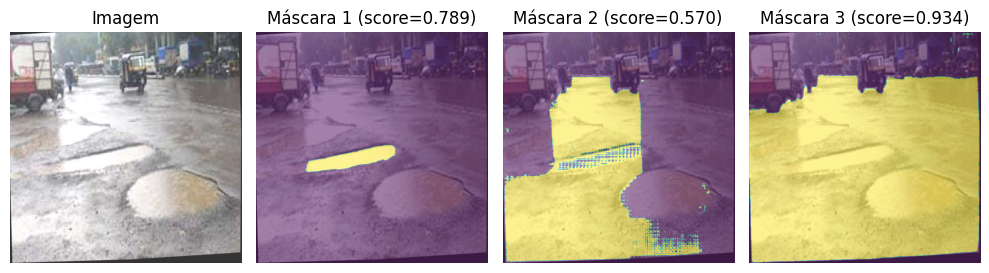

In [9]:
predictor = SamPredictor(sam)


# ==== CARREGAR IMAGEM ====
img_path = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images/pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)

h, w = image.shape[:2]
input_point = np.array([[w//2, h//2]])    # CORREÇÃO
input_label = np.array([1])               # CORREÇÃO

# ==== RODAR PREVISÃO ====
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)


# ==== MOSTRAR RESULTADOS ====
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Imagem")
plt.axis("off")

for i, m in enumerate(masks):
    plt.subplot(1, 4, i + 2)
    plt.imshow(image)
    plt.imshow(m, alpha=0.5)
    plt.title(f"Máscara {i+1} (score={scores[i]:.3f})")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Fine tune

In [ ]:
# --------------------------------------------------------------
# CONFIGURAÇÃO
# --------------------------------------------------------------

# AJUSTE AQUI: pastas do Kaggle
IMAGES_DIR = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images"
MASKS_DIR = "//kaggle/working/masks_train"

SAM_CHECKPOINT = "/kaggle/working/sam_vit_h_4b8939.pth"
SAM_TYPE = "vit_h"

IMG_SIZE = 1024
BATCH_SIZE = 1
LR = 1e-4
EPOCHS = 10
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# --------------------------------------------------------------
# CARREGAR SAM E CONGELAR O ENCODER
# --------------------------------------------------------------

sam = sam_model_registry[SAM_TYPE](checkpoint=SAM_CHECKPOINT).to(DEVICE)
image_encoder = sam.image_encoder
mask_decoder = sam.mask_decoder   # vamos treinar apenas esse

# congelar image encoder
for p in image_encoder.parameters():
    p.requires_grad = False

# --------------------------------------------------------------
# DATASET
# --------------------------------------------------------------

class SAMDataset(Dataset):
    def __init__(self, img_dir, mask_dir, size=IMG_SIZE):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.size = size

        self.images = sorted([
            f for f in os.listdir(img_dir)
            if f.lower().endswith((".jpg", ".png"))
        ])

        self.tf = T.ToTensor()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        name = self.images[idx]

        img_path = os.path.join(self.img_dir, name)
        mask_path = os.path.join(self.mask_dir, name.replace(".jpg","").replace(".png","") + "_mask.png")

        img = cv2.imread(img_path)[:,:,::-1]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, (self.size, self.size))
        mask = cv2.resize(mask, (self.size, self.size), interpolation=cv2.INTER_NEAREST)

        img = self.tf(img)
        mask = torch.from_numpy((mask > 127).astype(np.float32)).unsqueeze(0)

        return img, mask

dataset = SAMDataset(IMAGES_DIR, MASKS_DIR)
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# --------------------------------------------------------------
# NORMALIZAÇÃO DO SAM
# --------------------------------------------------------------

mean = torch.tensor([123.675,116.28,103.53]).view(3,1,1).to(DEVICE) / 255.0
std  = torch.tensor([58.395,57.12,57.375]).view(3,1,1).to(DEVICE) / 255.0

# --------------------------------------------------------------
# FUNÇÕES DE LOSS E MÉTRICAS
# --------------------------------------------------------------

bce = nn.BCEWithLogitsLoss()

def dice_loss(logits, target):
    p = torch.sigmoid(logits)
    inter = (p * target).sum()
    union = p.sum() + target.sum()
    return 1 - (2 * inter + 1e-6) / (union + 1e-6)

# --------------------------------------------------------------
# OTIMIZADOR (apenas mask decoder)
# --------------------------------------------------------------

optimizer = torch.optim.Adam([
    p for p in mask_decoder.parameters() if p.requires_grad
], lr=LR)

# --------------------------------------------------------------
# TREINO
# --------------------------------------------------------------

for epoch in range(EPOCHS):
    mask_decoder.train()
    total_loss = 0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for imgs, masks in pbar:
        imgs = imgs.to(DEVICE)
        masks = masks.to(DEVICE)

        imgs_norm = (imgs - mean) / std

        # obter embeddings do SAM
        with torch.no_grad():
            emb = image_encoder(imgs_norm)  

        B, _, H, W = imgs_norm.shape

        # ponto dummy
        coords = torch.tensor([[[W // 2, H // 2]]], device=DEVICE).float()
        labels = torch.tensor([[1]], device=DEVICE)  # ponto positivo
        
        points = (coords, labels)   # <- formato correto

        sparse_embeddings, dense_embeddings = sam.prompt_encoder(
            points=points,
            boxes=None,
            masks=None
        )

        # passar embeddings no decoder interno do SAM
        low_res_masks, _ = mask_decoder(
            image_embeddings=emb,
            image_pe=sam.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=False
        )

        # upsample p/ resolução da máscara
        pred = torch.nn.functional.interpolate(
            low_res_masks, 
            size=(IMG_SIZE, IMG_SIZE), 
            mode="bilinear", 
            align_corners=False
        )

        loss = bce(pred, masks) + dice_loss(pred, masks)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_postfix(loss=total_loss/(pbar.n+1))

print("Treino finalizado.")

# --------------------------------------------------------------
# SALVAR MODELO
# --------------------------------------------------------------

os.makedirs("sam_finetuned", exist_ok=True)
torch.save(mask_decoder.state_dict(), "sam_finetuned/mask_decoder_finetuned.pth")

print("Modelo salvo em: sam_finetuned/mask_decoder_finetuned.pth")


Epoch 2/10:  12%|█▏        | 85/720 [01:36<11:58,  1.13s/it, loss=0.77] 

## Segmentação Automática com AutomaticMaskGenerator (SAM)
Usamos o AutomaticMaskGenerator para segmentar todos os objetos da imagem automaticamente, sem necessidade de pontos ou bounding boxes.


In [10]:
from segment_anything import SamAutomaticMaskGenerator


In [11]:
# Criando o gerador automático de máscaras
mask_generator = SamAutomaticMaskGenerator(sam)


In [12]:
# Gerar todas as máscaras da imagem automaticamente
masks = mask_generator.generate(image)
print(f"Número de máscaras encontradas: {len(masks)}")


Número de máscaras encontradas: 36


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def show_anns(anns):
    if len(anns) == 0:
        return
    
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], 
                   sorted_anns[0]['segmentation'].shape[1], 3))
    for ann in sorted_anns:
        m = ann['segmentation']
        color = np.random.random(3)
        img[m] = color

    ax.imshow(img)


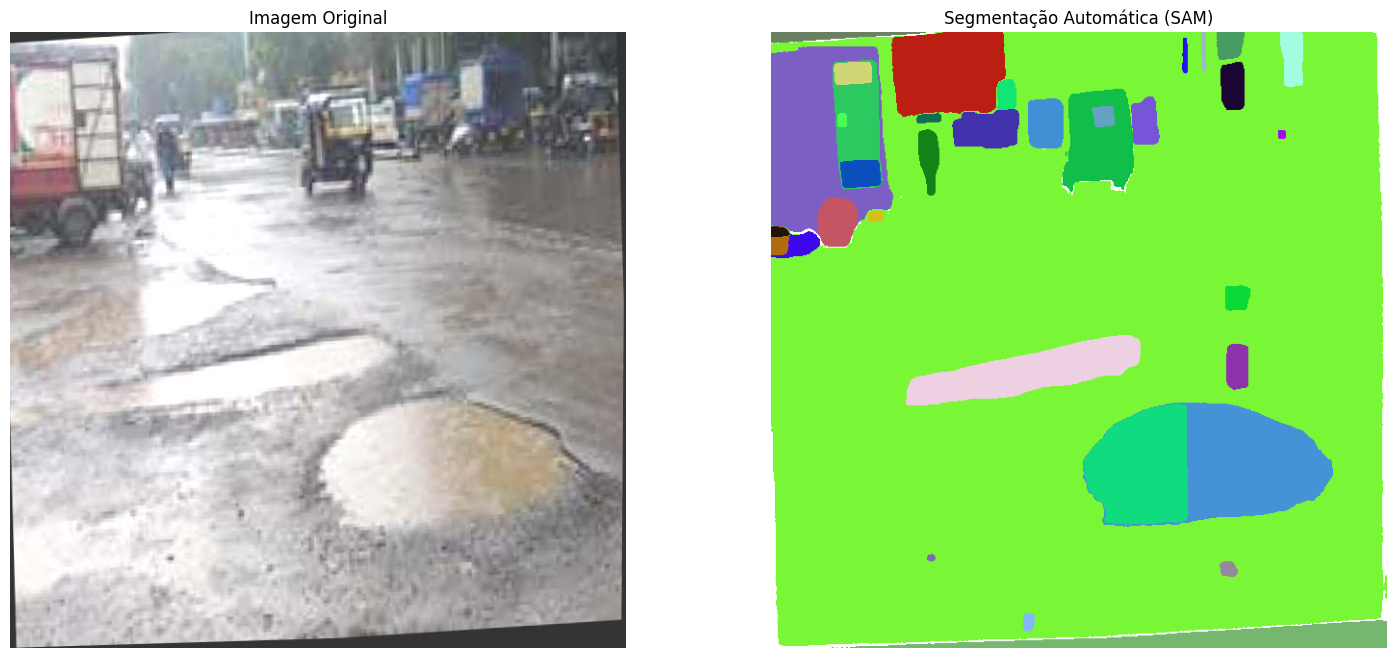

In [15]:
plt.figure(figsize=(18, 8))

#  Imagem original 
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagem Original")
plt.axis("off")

#  Máscaras automáticas 
plt.subplot(1, 2, 2)
plt.imshow(image)
show_anns(masks)
plt.title("Segmentação Automática (SAM)")
plt.axis("off")

plt.show()


## Segmentação Interativa com Pontos Iterativos (SAM)
Realizamos segmentação iterativa: adicionamos pontos positivos/negativos em sequência e o SAM atualiza a máscara a cada interação. Isso demonstra o poder interativo do modelo.


In [16]:
predictor = SamPredictor(sam)
predictor.set_image(image)


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de pontos positivos e negativos
point_coords = []
point_labels = []   # 1 = positivo, 0 = negativo

def plot_iteration(image, masks, points, labels, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # plot pontos
    for (x, y), label in zip(points, labels):
        color = 'green' if label == 1 else 'red'
        plt.scatter(x, y, color=color, s=150, edgecolors='white')
    
    # plot máscara
    if masks is not None:
        plt.imshow(masks[0], alpha=0.6)
    
    plt.title(title)
    plt.axis("off")
    plt.show()


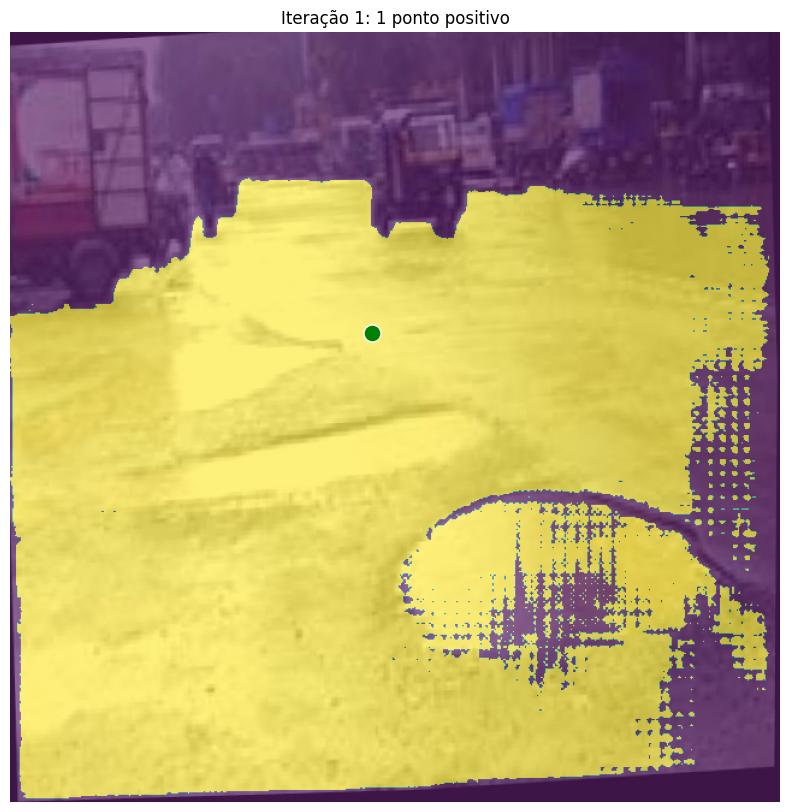

In [18]:
# Exemplo: adicionar um ponto positivo
new_point = np.array([300, 250])   # altere para onde quiser
point_label = 1  # positivo

point_coords.append(new_point)
point_labels.append(point_label)

masks, scores, logits = predictor.predict(
    point_coords=np.array(point_coords),
    point_labels=np.array(point_labels),
    multimask_output=False
)

plot_iteration(image, masks, point_coords, point_labels, "Iteração 1: 1 ponto positivo")


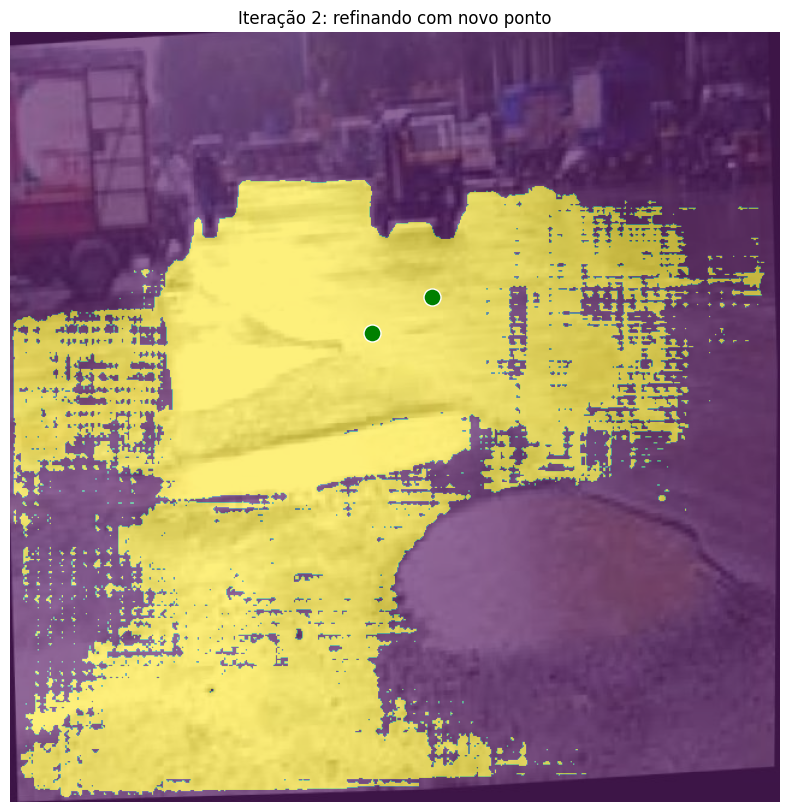

In [19]:
# Outro ponto positivo ou negativo
new_point = np.array([350, 220])
point_label = 1  # pode trocar para 0 (negativo)

point_coords.append(new_point)
point_labels.append(point_label)

masks, scores, logits = predictor.predict(
    point_coords=np.array(point_coords),
    point_labels=np.array(point_labels),
    multimask_output=False
)

plot_iteration(image, masks, point_coords, point_labels, "Iteração 2: refinando com novo ponto")


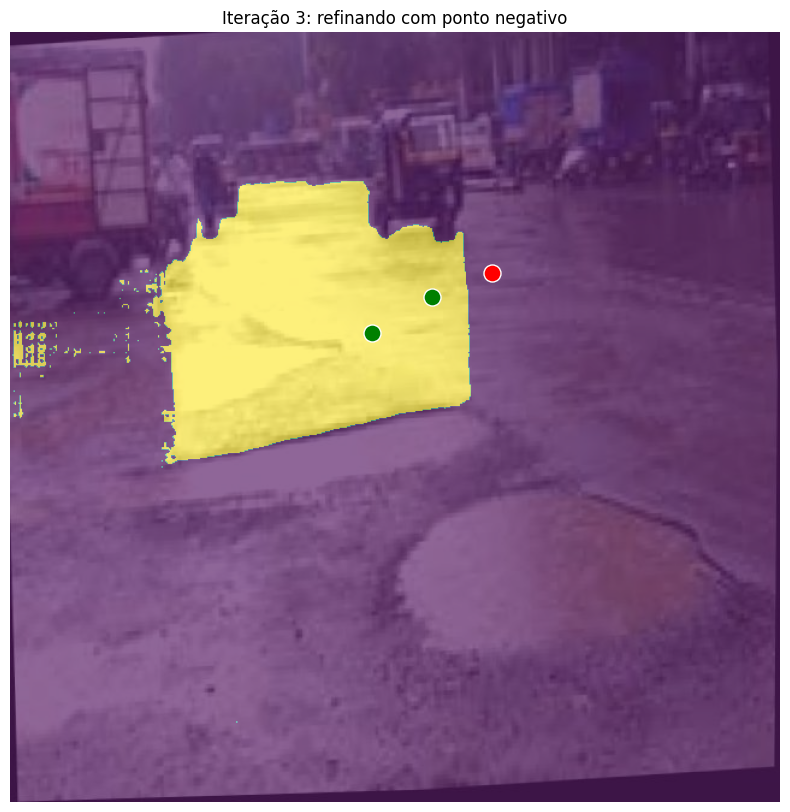

In [20]:
new_point = np.array([400, 200])
point_label = 0  # negativo

point_coords.append(new_point)
point_labels.append(point_label)

masks, scores, logits = predictor.predict(
    point_coords=np.array(point_coords),
    point_labels=np.array(point_labels),
    multimask_output=False
)

plot_iteration(image, masks, point_coords, point_labels, "Iteração 3: refinando com ponto negativo")


## Comparação entre os modelos SAM: ViT-B, ViT-L e ViT-H

Comparamos desempenho e qualidade entre os três checkpoints do SAM:
- ViT-B: menor, mais rápido
- ViT-L: intermediário
- ViT-H: maior, mais preciso

Usamos o mesmo prompt para os três modelos e exibimos as máscaras lado a lado.


In [21]:
import time
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt


In [28]:
import urllib.request
import os

# Links oficiais da Meta AI para os pesos do SAM
checkpoint_urls = {
    "ViT-B": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth",
    "ViT-L": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth",
    "ViT-H": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
}

# Garantir que a pasta exista
os.makedirs("checkpoints", exist_ok=True)

# Baixar arquivos se não existirem
for name, url in checkpoint_urls.items():
    local_path = f"checkpoints/{os.path.basename(url)}"
    if not os.path.exists(local_path):
        print(f" Baixando {name}...")
        urllib.request.urlretrieve(url, local_path)
    else:
        print(f" {name} já existe.")

print(" Todos os checkpoints prontos!")


 Baixando ViT-B...
 Baixando ViT-L...
 Baixando ViT-H...
 Todos os checkpoints prontos!


In [29]:
# Caminhos para os pesos de cada versão do SAM
ckpts = {
    "ViT-B": "checkpoints/sam_vit_b_01ec64.pth",
    "ViT-L": "checkpoints/sam_vit_l_0b3195.pth",
    "ViT-H": "checkpoints/sam_vit_h_4b8939.pth"
}



Função que carrega, roda o prompt e mede tempo

Escolhemos se queremos comparar por ponto ou bounding box.
O exemplo é a comparação por ponto, pois é mais simples e universal.

In [25]:
def evaluate_sam_checkpoint(name, ckpt_path, image, point):
    print(f"\n Avaliando {name}...")
    
    # Carregar modelo
    sam = sam_model_registry[name.lower().replace("-", "_")](checkpoint=ckpt_path)
    predictor = SamPredictor(sam)
    predictor.set_image(image)

    # Tempo de inferência
    start = time.time()

    masks, scores, logits = predictor.predict(
        point_coords=np.array([point]),
        point_labels=np.array([1]),
        multimask_output=False
    )

    elapsed = time.time() - start
    
    return masks[0], elapsed


In [30]:
test_point = np.array([300, 300])  # ajuste conforme a imagem

results = {}
for name, ckpt in ckpts.items():
    mask, t = evaluate_sam_checkpoint(name, ckpt, image, test_point)
    results[name] = (mask, t)



 Avaliando ViT-B...

 Avaliando ViT-L...

 Avaliando ViT-H...


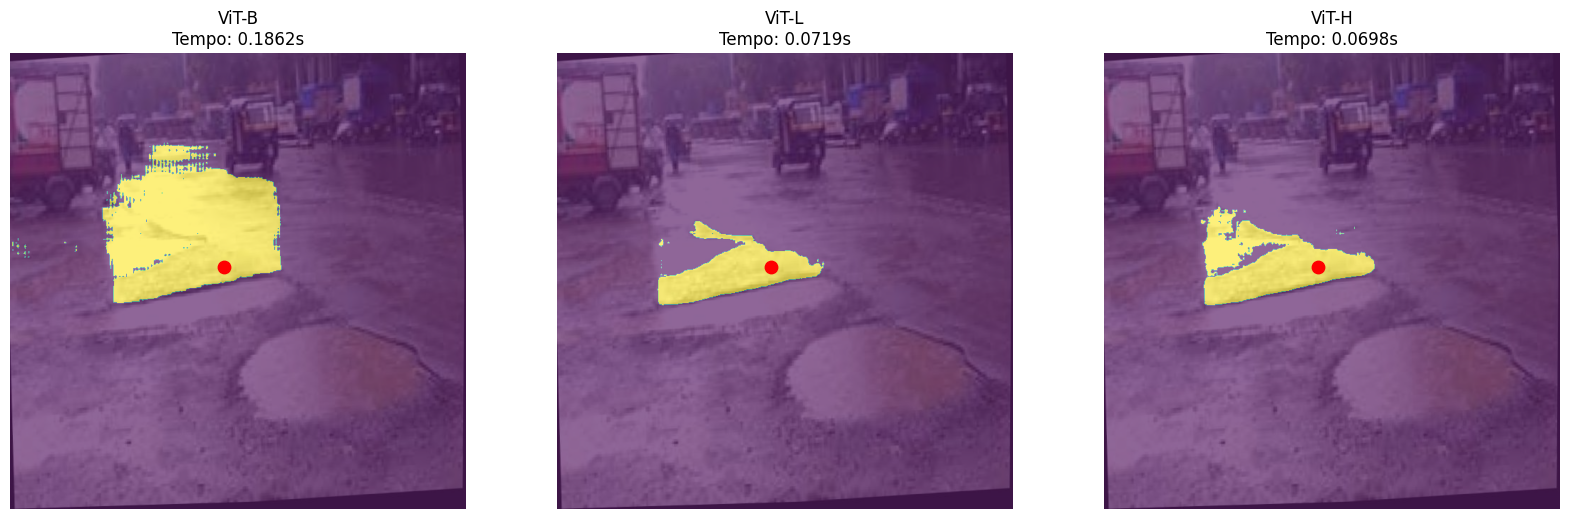


 Desempenho comparado:
ViT-B: 0.1862 segundos
ViT-L: 0.0719 segundos
ViT-H: 0.0698 segundos


In [31]:
plt.figure(figsize=(20, 6))

for i, (name, (mask, time_elapsed)) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.6)
    plt.scatter([test_point[0]], [test_point[1]], color='red', s=80)
    plt.title(f"{name}\nTempo: {time_elapsed:.4f}s")
    plt.axis("off")

plt.show()

print("\n Desempenho comparado:")
for name, (_, t) in results.items():
    print(f"{name}: {t:.4f} segundos")


## Segmentação por Texto com GroundingDINO + SAM (Grounded-SAM)

Adicionamos segmentação orientada por linguagem utilizando:
- **GroundingDINO** : detecta objetos com base em um prompt textual
- **SAM** : faz a segmentação precisa da região detectada

Fluxo:
1. Digite um texto como: `"um gato"`, `"pessoa"`, `"capacete"`, `"carro vermelho"`, etc.
2. GroundingDINO produz bounding boxes alinhadas ao texto.
3. SAM utiliza as boxes para gerar máscaras de alta qualidade.

